> imports

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math

# Задание 2
 > Интерполирование функций

In [163]:
# setup
# f(x) = tg x − cos x + 0.1;
def f(x):
    return np.tan(x) - np.cos(x) + 0.1

epsilon = 1e-6
maxiter = 2000

def showGraph(F, P, x, fx, label1='F(x)', label2='P(x)', title='tg x − cos x + 0.1'):
    ls = np.linspace(-np.pi, np.pi, maxiter)
    F_ls = np.array(list(map(F, ls.tolist())))
    P_ls = np.array(list(map(P, ls.tolist())))

    fig, ax = plt.subplots()
    plt.ylim(-15, 15)

    ax.plot(ls, F_ls, label = label1)
    ax.plot(ls, P_ls, label = label2)
    ax.scatter(x, fx, label = 'Узлы', c='red', marker='*')

    ax.set(title=title)
    ax.legend()
    ax.grid()

In [164]:
# 1 выбор отрезка непрерывности
a, b = 0, 0
fa, fb = f(a), f(b)

for i in range(maxiter):
    exit = [False, False]
    # a
    # print(a, b, f(a), f(a - 0.01))
    if(  abs(f(a) - f(a - 0.01)) < 1 ):
        a = a - 0.01
    else:
        exit[0] = True
    # b
    if(  abs(f(b) - f(b + 0.01)) < 1 ):
        b = b + 0.01
    else:
        exit[1] = True
    
    if(all(exit)):
        break

a, b = round(a, 6), round(b, 6)
print(a, b)



-1.47 1.47


X:  [-1.05 -0.63 -0.21  0.21  0.63  1.05]
F(x):  [-2.14089 -1.43714 -1.09117 -0.66489  0.02109  1.34574]


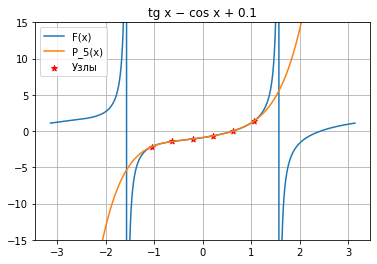

In [165]:
# 2 Построение интерполяционного полинома
def inter(x, fx):
    n = len(x)

    def l(k):
        omega = lambda w_x: np.array([ w_x - x[i] if i != k else 1 for i in range(n)]).prod()
        return lambda arg: omega(arg) / omega(x[k])

    def P(arg):
        sum = 0
        for k in range(n):
            l_k = l(k)
            sum += l_k(arg)*fx[k]
        return sum

    return P

N = 5

X = np.linspace(a, b, N + 3)[1: -1]
FX = np.array(list(map(f , X)))


print('X: ', X)
print('F(x): ', FX)

P_x = inter(X, FX)

showGraph(f, P_x, X, FX, 'F(x)', f'P_{N}(x)', 'tg x − cos x + 0.1')



X_new:  [ 1.41991  1.03945  0.38046 -0.38046 -1.03945 -1.41991]
F(x)_new:  [ 6.52686  1.29476 -0.42854 -1.22844 -2.10816 -6.62749]


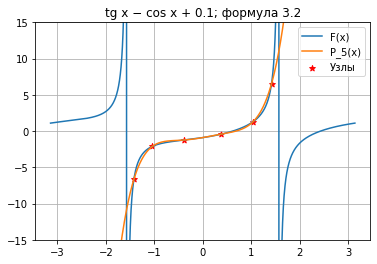

In [166]:
# 2.b использование формулы 3.2
X_new = np.array([
    ((b - a) * np.cos( (2 * i + 1)/(2 * N + 2) * np.pi) + (b + a)) / 2
    for i in range(N + 1)
])
FX_new = np.array(list(map(f, X_new)))

print('X_new: ', X_new)
print('F(x)_new: ', FX_new)



P_x_new = inter(X_new, FX_new)
showGraph(f, P_x_new, X_new, FX_new, 'F(x)', f'P_{N}(x)', 'tg x − cos x + 0.1; формула 3.2')


N = 5:
X:  [-1.05 -0.63 -0.21  0.21  0.63  1.05]
F(x):  [-2.14089 -1.43714 -1.09117 -0.66489  0.02109  1.34574]

N = 6:
X:  [-1.1025 -0.735  -0.3675  0.      0.3675  0.735   1.1025]
F(x):  [-2.32834 -1.54579 -1.21822 -0.9     -0.44824  0.26213  1.6256 ]

N = 7:
X:  [-1.14333 -0.81667 -0.49    -0.16333  0.16333  0.49     0.81667  1.14333]
F(x):  [-2.50969 -1.64923 -1.31572 -1.05149 -0.72189 -0.24894  0.47992  1.88057]

N = 8:
X:  [-1.176 -0.882 -0.588 -0.294  0.     0.294  0.588  0.882  1.176]
F(x):  [-2.68458 -1.75021 -1.39871 -1.15987 -0.9     -0.55432 -0.06539  0.67899
  2.11534]

N = 9:
X:  [-1.20273 -0.93545 -0.66818 -0.40091 -0.13364  0.13364  0.40091  0.66818
  0.93545  1.20273]
F(x):  [-2.85288 -1.8497  -1.47425 -1.24457 -1.02552 -0.75665 -0.39684  0.10435
  0.8628   2.33325]


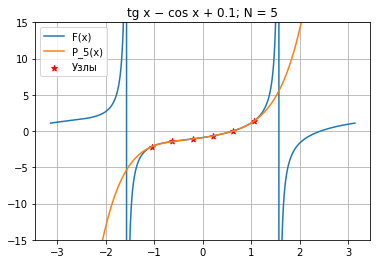

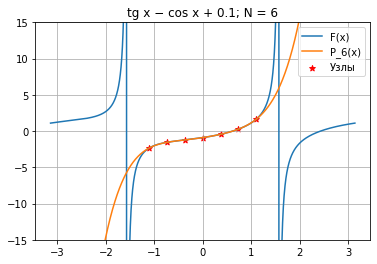

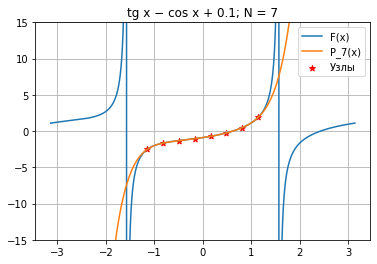

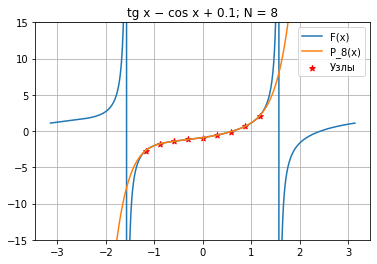

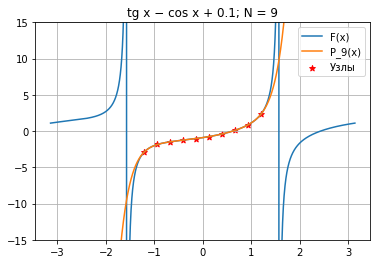

In [174]:
# 3 увеличение N

np.set_printoptions(precision=5)
for N_inc in range(5, 10):
    print(f'\nN = {N_inc}:')
    X_inc = np.linspace(a, b, N_inc + 3)[1: -1]
    FX_inc = np.array(list(map(f , X_inc)))
    print('X: ', X_inc)
    print('F(x): ', FX_inc) 

    P_x_inc = inter(X_inc, FX_inc)
    showGraph(f, P_x_inc, X_inc, FX_inc, 'F(x)', f'P_{N_inc}(x)', f'tg x − cos x + 0.1; N = {N_inc}')


X:  [-1.05 -0.63 -0.21  0.21  0.63  1.05]
F(x):  [-2.24793 -0.9054  -0.22915 -0.13963  0.01328  1.41303]


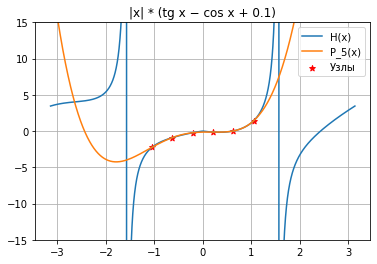

In [175]:
# 4 функция |x| * f(x)
def h(x):
    return abs(x) * f(x)


N_h = 5

X_h = np.linspace(a, b, N_h + 3)[1: -1]
FX_h = np.array(list(map(h , X)))


print('X: ', X_h)
print('F(x): ', FX_h)

P_x_h = inter(X_h, FX_h)

showGraph(h, P_x_h, X_h, FX_h, 'H(x)', f'P_{N_h}(x)', '|x| * (tg x − cos x + 0.1)')

X:  [ 1.41991  1.03945  0.38046 -0.38046 -1.03945 -1.41991]
F(x):  [ 9.26756  1.34584 -0.16304 -0.46738 -2.19132 -9.41045]


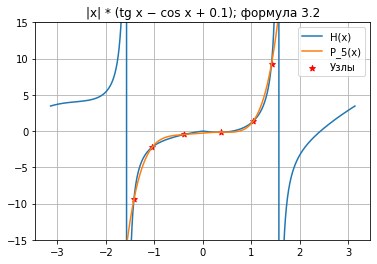

In [176]:
# 4.1
X_new_h = np.array([
    ((b - a) * np.cos( (2 * i + 1)/(2 * N_h + 2) * np.pi) + (b + a)) / 2
    for i in range(N_h + 1)
])
FX_new_h = np.array(list(map(h, X_new_h)))
print('X: ', X_new_h)
print('F(x): ', FX_new_h)

P_x_new_h = inter(X_new_h, FX_new_h)

showGraph(h, P_x_new_h, X_new_h, FX_new_h, 'H(x)', f'P_{N_h}(x)', '|x| * (tg x − cos x + 0.1); формула 3.2')


N = 5:
X:  [-1.05 -0.63 -0.21  0.21  0.63  1.05]
F(x):  [-2.24793 -0.9054  -0.22915 -0.13963  0.01328  1.41303]

N = 6:
X:  [-1.1025 -0.735  -0.3675  0.      0.3675  0.735   1.1025]
F(x):  [-2.56699 -1.13616 -0.4477  -0.      -0.16473  0.19267  1.79223]

N = 7:
X:  [-1.14333 -0.81667 -0.49    -0.16333  0.16333  0.49     0.81667  1.14333]
F(x):  [-2.86942 -1.34687 -0.6447  -0.17174 -0.11791 -0.12198  0.39194  2.15011]

N = 8:
X:  [-1.176 -0.882 -0.588 -0.294  0.     0.294  0.588  0.882  1.176]
F(x):  [-3.15707 -1.54369 -0.82244 -0.341   -0.      -0.16297 -0.03845  0.59887
  2.48765]

N = 9:
X:  [-1.20273 -0.93545 -0.66818 -0.40091 -0.13364  0.13364  0.40091  0.66818
  0.93545  1.20273]
F(x):  [-3.43124 -1.73031 -0.98507 -0.49896 -0.13705 -0.10112 -0.1591   0.06972
  0.80711  2.80627]


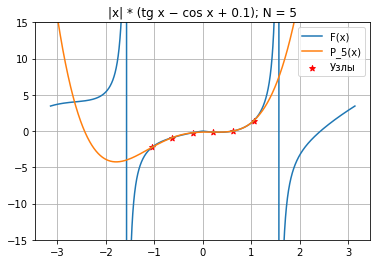

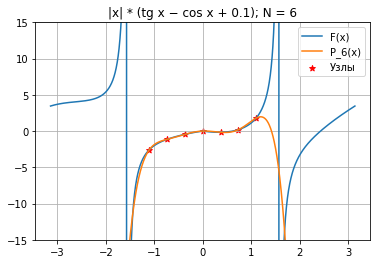

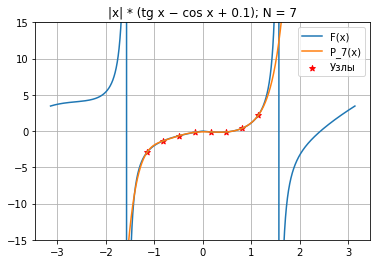

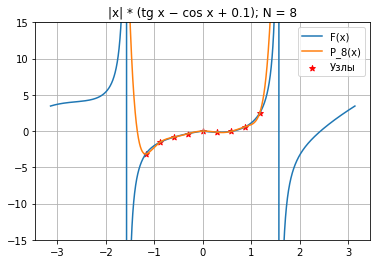

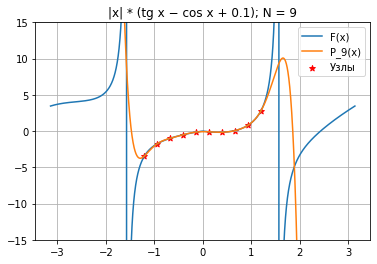

In [177]:
# 4.2 увеличение N

for N_inc in range(5, 10):
    print(f'\nN = {N_inc}:')
    X_inc = np.linspace(a, b, N_inc + 3)[1: -1]
    FX_inc = np.array(list(map(h , X_inc)))
    print('X: ', X_inc)
    print('F(x): ', FX_inc) 
    P_x_inc = inter(X_inc, FX_inc)

    showGraph(h, P_x_inc, X_inc, FX_inc, 'F(x)', f'P_{N_inc}(x)', f'|x| * (tg x − cos x + 0.1); N = {N_inc}')
